In [104]:
import scipy as sp
import scipy.linalg as la
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from ipywidgets import interact
%matplotlib inline

In [105]:
k1 = 2.97*10e5
k2= 1*10e5
l1 = 3
l2 = 2
w = 1000
Id = 7.06
Ip = 13.69
be = 1.5707963268
ta = 0.9
m = 1
mi=1
ksi = 0.1
c1=2*ksi*((m*k1)**0.5)
c2=2*ksi*((m*k2)**0.5)
ca = c1+c2
cb = cc = c1*l1-c2*l2
cd = c1*(l1**2)+c2*(l2**2)
al = k1+k2
ga = k1*l1-k2*l2
de = k1*(l1**2)+k2*(l2**2)
omega = sp.linspace(0, 4*((k1+k2)/m)**0.5, 1000)

In [106]:
M = sp.array([[m, 0,0,0],
              [0,m,0,0],
              [0,0,Id,0],
              [0,0,0,Id]])
G = sp.array([[0,0,0,0],
              [0,0,0,0],
              [0,0,0,Ip],
              [0,0,-Ip,0]])
C = sp.array([[ca,0,cb,0],
              [0,ca,0,cb],
              [cc,0,cd,0],
              [0,cc,0,cd]])
Kt = sp.array([[al,0,ga,0],
              [0,al,0,ga],
              [ga,0,de,0],
              [0,ga,0,de]])


'''K = sp.array([[-al/m, 0,-ga/m,0],
              [0, -al/m,0,-ga/m],
              [-ga/Id,0,-de/Id,0],
              [0,-ga/Id,0,-de/Id]])

GCw = sp.array([[-ca/m,0,-cb/m,0],
                [0,-ca/m,0,-cb/m],
                [-cc/Id,0,-cd/Id,-Ip*w/Id],
                [0,-cc/Id,-Ip*w/Id,-cd/Id]])'''

'''F = sp.array([[m*mi*(O**2)],[m*mi*(O**2)],[(Ip-Id)*(O**2)*ta],[(Ip-Id)*(O**2)*ta]])'''

I = sp.eye(len(Kt))
Z = sp.zeros_like(Kt)
Idinv = la.inv(M)

In [116]:
Kt

array([[  3970000.,         0.,   6910000.,         0.],
       [        0.,   3970000.,         0.,   6910000.],
       [  6910000.,         0.,  30730000.,         0.],
       [        0.,   6910000.,         0.,  30730000.]])

In [112]:
vw = []
vt = []
vy = []
vx = []
for O in omega:
    x ,y ,si ,ro = la.inv(((-O**2)*M+1.j*O*(0.*C+O*G)+Kt))@ sp.array([[m*mi*(O**2)],
                                                                  [m*mi*(O**2)],
                                                                  [(Ip-Id)*(O**2)*ta],
                                                                  [(Ip-Id)*(O**2)*ta]])
    vw.append(sp.absolute(si))
    vt.append(sp.absolute(ro))
    vx.append(sp.absolute(x))
    vy.append(sp.absolute(y))
    

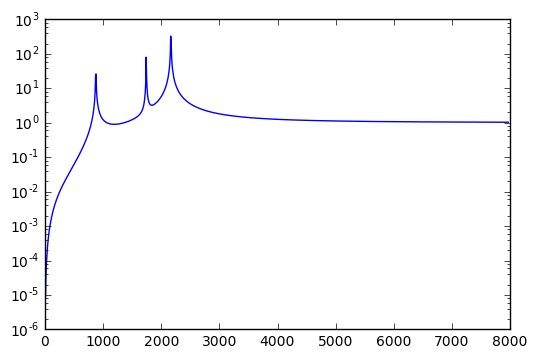

In [115]:
plt.semilogy(omega, vx)

In [121]:
omega = sp.linspace(0, 10, 10)

In [127]:
A = sp.vstack([sp.hstack([         Z,            I]),
               sp.hstack([-Idinv @ Kt, -Idinv @ G*w])])
fw = []
bw = []
for w in omega:
    A = sp.vstack([sp.hstack([         Z,            I]),
                   sp.hstack([-Idinv @ Kt, -Idinv @ G*w*0])])
    evalues, evects = la.eig(A)
    evalues = sp.sort(evalues.imag)
    print(evalues)
    wn = (sp.sqrt(evalues)).real
    print(wn)
    bw.append(wn[0])
    fw.append(wn[1])

[-2601.72793426 -2601.72793426 -1246.47622289 -1246.47622289  1246.47622289
  1246.47622289  2601.72793426  2601.72793426]
[  0.           0.           0.           0.          35.30547016
  35.30547016  51.00713611  51.00713611]
[-2601.72793426 -2601.72793426 -1246.47622289 -1246.47622289  1246.47622289
  1246.47622289  2601.72793426  2601.72793426]
[  0.           0.           0.           0.          35.30547016
  35.30547016  51.00713611  51.00713611]
[-2601.72793426 -2601.72793426 -1246.47622289 -1246.47622289  1246.47622289
  1246.47622289  2601.72793426  2601.72793426]
[  0.           0.           0.           0.          35.30547016
  35.30547016  51.00713611  51.00713611]
[-2601.72793426 -2601.72793426 -1246.47622289 -1246.47622289  1246.47622289
  1246.47622289  2601.72793426  2601.72793426]
[  0.           0.           0.           0.          35.30547016
  35.30547016  51.00713611  51.00713611]
[-2601.72793426 -2601.72793426 -1246.47622289 -1246.47622289  1246.47622289
  12

In [119]:
A.shape

(8, 8)

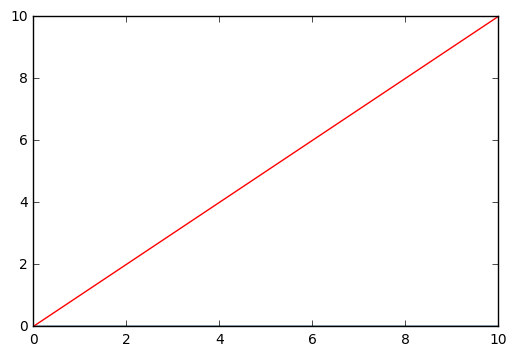

In [124]:
plt.plot(omega, bw)
plt.plot(omega, fw)
plt.plot(omega, omega)

In [100]:
A = sp.vstack([sp.hstack([         Z,            I]),
               sp.hstack([-Idinv @ Kt, -Idinv @ G*w])])
'''x1, y1, si1, ro1, x2, y2, si2, ro2'''

def fun(x,t):
    m=2
    
    # definir x1 e x2:
    x1, y1, si1, ro1, x2, y2, si2, ro2 = x
    
    # calcular dxdt utilizando a função cos como forçamento (F0*sp.cos)
    dxdt = D = A @ [x1, y1, si1, ro1, x2, y2, si2, ro2] + [0,0,0,0,mi*sp.cos(w*t),mi*sp.sin(w*t),(1-Id/Ip)*ta*(w**2)*sp.cos(w*t),
                                                  (1-Id/Ip)*ta*(w**2)*sp.sin(w*t)]
    
    return dxdt

In [101]:
#Criar array com condições iniciais
z0 = [0,0,0,0,0,0,0,0]

# Criar array com o tempo
tf = 20
t = sp.linspace(0,tf,10000)

In [102]:
sol =  odeint(fun,z0,t)

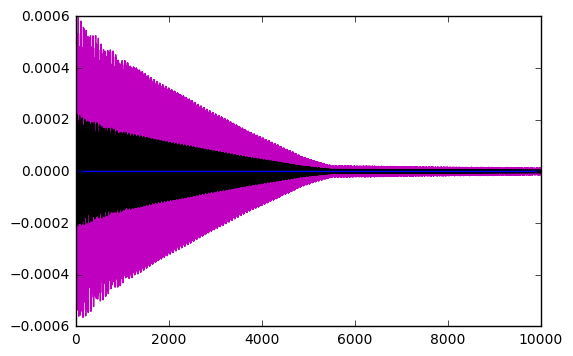

In [103]:
plt.plot(sol)